In [1]:
import pandas as pd # import Pandas

In [2]:
import numpy as np

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [4]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [5]:
data[1] # 0.5

0.5

In [6]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a','b','c','d'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [7]:
data['b']

0.5

In [8]:
population_dict = {'istanbul':16_000_000, 'ankara':5_000_000, 'izmir':4_000_000}
population = pd.Series(population_dict)
population

istanbul    16000000
ankara       5000000
izmir        4000000
dtype: int64

In [9]:
type(population) # !

pandas.core.series.Series

In [10]:
area_dict = {'istanbul':3_000, 'ankara':4_000, 'izmir':2_500}

In [11]:
sehirler = pd.DataFrame({'nufus':population_dict, 'alan':area_dict})
sehirler

,nufus,alan
istanbul,16000000,3000
ankara,5000000,4000
izmir,4000000,2500


In [12]:
type(sehirler)

pandas.core.frame.DataFrame

In [13]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a','b','c','d'])

In [14]:
data.keys() # Pandas Series index isimleri

Index(['a', 'b', 'c', 'd'], dtype='object')

In [16]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [18]:
sehirler

,nufus,alan
istanbul,16000000,3000
ankara,5000000,4000
izmir,4000000,2500


In [19]:
sehirler['alan']

istanbul    3000
ankara      4000
izmir       2500
Name: alan, dtype: int64

In [20]:
type(sehirler['alan'])

pandas.core.series.Series

In [21]:
sehirler.alan # data['alan']

istanbul    3000
ankara      4000
izmir       2500
Name: alan, dtype: int64

In [22]:
# Gezegenler veri seti
import seaborn as sns

In [23]:
gezegenler = sns.load_dataset('planets')
gezegenler.shape

(1035, 6)

In [24]:
gezegenler.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [25]:
gezegenler.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [26]:
gezegenler.groupby('method')

In [28]:
gezegenler.groupby('method')['orbital_period'].mean()

method
Astrometry                          631.180000
Eclipse Timing Variations          4751.644444
Imaging                          118247.737500
Microlensing                       3153.571429
Orbital Brightness Modulation         0.709307
Pulsar Timing                      7343.021201
Pulsation Timing Variations        1170.000000
Radial Velocity                     823.354680
Transit                              21.102073
Transit Timing Variations            79.783500
Name: orbital_period, dtype: float64

In [30]:
# Pivot tablolalar
titanic = sns.load_dataset('titanic')

In [31]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
# Cinsiyete göre kurtulanların yüzde oranları
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [33]:
# Seyahat ettikleri sınıfa göre kurtulanların yüzdeleri
titanic.groupby('class')[['survived']].mean()

,survived
class,
First,0.629630
Second,0.472826
Third,0.242363


In [35]:
# Kurtulanların cinsiyet ve yolculuk ettikleri sınıfa göre yüzdelik değerleri
titanic.groupby(['sex','class'])['survived'].aggregate('mean')

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [36]:
titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [37]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [38]:
# Yaş bilgisini de ekleyerek yeni tablo
age = pd.cut(titanic['age'], [0, 18, 80])

In [41]:
age.head(10)

0    (18.0, 80.0]
1    (18.0, 80.0]
2    (18.0, 80.0]
3    (18.0, 80.0]
4    (18.0, 80.0]
5             NaN
6    (18.0, 80.0]
7     (0.0, 18.0]
8    (18.0, 80.0]
9     (0.0, 18.0]
Name: age, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [42]:
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [44]:
# String işlemleri
isimler = pd.Series(['Ali Kurt','Mehmet Cebe','Nuri Korkmaz'])

In [45]:
isimler.str.lower() # hepsini küçük harf

0        ali kurt
1     mehmet cebe
2    nuri korkmaz
dtype: object

In [47]:
isimler.str.len() # kaç karakter

0     8
1    11
2    12
dtype: int64

In [50]:
# Pandas ve Zaman verisi
tarihIndex = pd.DatetimeIndex(['2025-03-12','2025-03-19','2025-04-09','2025-04-18'])
data = pd.Series([24, 28, 32, 39], index=tarihIndex)
data

2025-03-12    24
2025-03-19    28
2025-04-09    32
2025-04-18    39
dtype: int64

In [52]:
data['2025-04-09']

32

In [53]:
data['2025-03-19':'2025-04-18']# !!

2025-03-19    28
2025-04-09    32
2025-04-18    39
dtype: int64

In [54]:
data['2025-04']# 2025 Nisan ayı verileri

2025-04-09    32
2025-04-18    39
dtype: int64

In [55]:
# date_range
pd.date_range('2025-04-01','2025-05-01')

DatetimeIndex(['2025-04-01', '2025-04-02', '2025-04-03', '2025-04-04',
               '2025-04-05', '2025-04-06', '2025-04-07', '2025-04-08',
               '2025-04-09', '2025-04-10', '2025-04-11', '2025-04-12',
               '2025-04-13', '2025-04-14', '2025-04-15', '2025-04-16',
               '2025-04-17', '2025-04-18', '2025-04-19', '2025-04-20',
               '2025-04-21', '2025-04-22', '2025-04-23', '2025-04-24',
               '2025-04-25', '2025-04-26', '2025-04-27', '2025-04-28',
               '2025-04-29', '2025-04-30', '2025-05-01'],
              dtype='datetime64[ns]', freq='D')

In [56]:
pd.date_range('2025-04-01', periods=8)

DatetimeIndex(['2025-04-01', '2025-04-02', '2025-04-03', '2025-04-04',
               '2025-04-05', '2025-04-06', '2025-04-07', '2025-04-08'],
              dtype='datetime64[ns]', freq='D')

In [57]:
pd.date_range('2025-01', periods=12, freq='M') # 2025 yılının 12 ayını

DatetimeIndex(['2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31',
               '2025-09-30', '2025-10-31', '2025-11-30', '2025-12-31'],
              dtype='datetime64[ns]', freq='M')

In [64]:
#pip install yfinance # Yahoo finance
import yfinance as yf

In [65]:
google = yf.Ticker("GOOG")

In [66]:
son_fiyat = google.history(period='1d')['Close'].iloc[-1]
print(son_fiyat)

146.5800018310547


In [67]:
goog = google.history(period='1Y')

In [68]:
goog.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-09 00:00:00-04:00,156.608262,159.136282,155.901602,157.394531,21538100,0.0,0.0
2024-04-10 00:00:00-04:00,157.135727,157.414406,155.463639,156.916763,16339200,0.0,0.0
2024-04-11 00:00:00-04:00,157.593566,160.360459,157.185495,160.032013,17841700,0.0,0.0
2024-04-12 00:00:00-04:00,158.653543,160.937722,157.852345,158.439560,16968200,0.0,0.0
2024-04-15 00:00:00-04:00,159.524409,160.071819,155.413873,155.593033,21140900,0.0,0.0


In [69]:
goog['Close'].mean() # Kapanış fiyatlarını ortalaması

174.12282024246764

In [71]:
goog['Volume'].mean() # Günlük ortalama hacim

19216914.34262948

<AxesSubplot: title={'center': 'GOOGLE Hisse Fiyatı'}, xlabel='Date'>

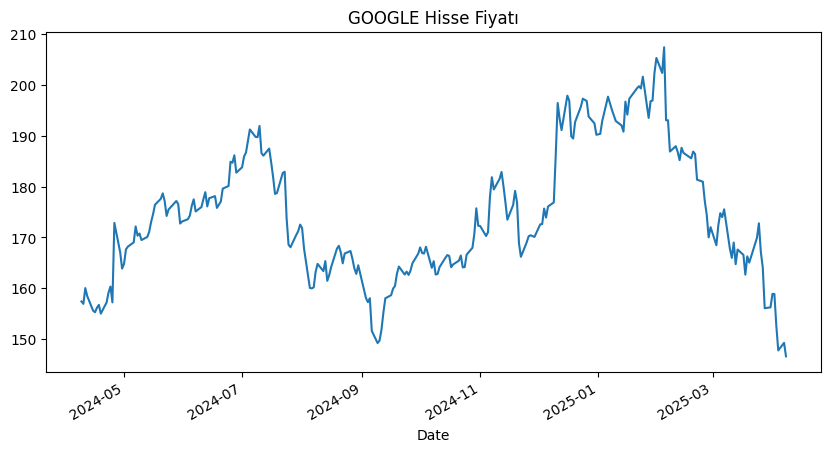

In [72]:
goog['Close'].plot(figsize=(10,5), title='GOOGLE Hisse Fiyatı')

<AxesSubplot: title={'center': 'GOOGLE Hisse Fiyatı Günlük Hacim'}, xlabel='Date'>

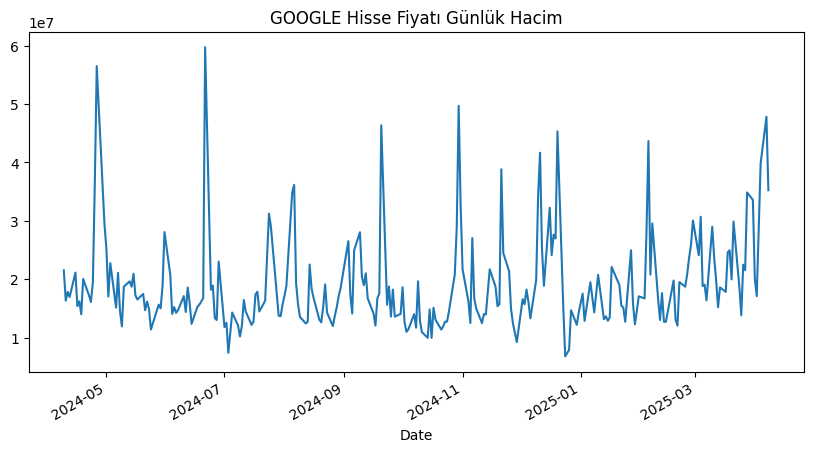

In [73]:
goog['Volume'].plot(figsize=(10,5), title='GOOGLE Hisse Fiyatı Günlük Hacim')

In [78]:
haftalik_ortalama = goog['Close'].resample('W').mean()
haftalik_ortalama.head()

Date
2024-04-14 00:00:00-04:00    158.195717
2024-04-21 00:00:00-04:00    155.740338
2024-04-28 00:00:00-04:00    161.357739
2024-05-05 00:00:00-04:00    166.324219
2024-05-12 00:00:00-04:00    170.361096
Freq: W-SUN, Name: Close, dtype: float64

<AxesSubplot: xlabel='Date'>

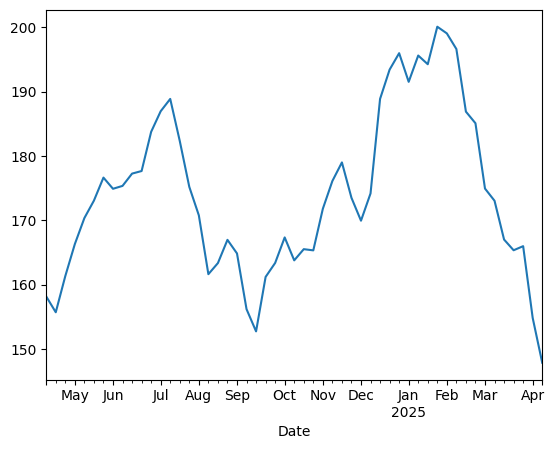

In [79]:
haftalik_ortalama.plot()

In [82]:
aylik_ortalama = goog['Close'].resample('M').mean() # Aylik ortalama kapanış değerleri
aylik_ortalama.head()

Date
2024-04-30 00:00:00-04:00    159.327851
2024-05-31 00:00:00-04:00    172.755389
2024-06-30 00:00:00-04:00    178.549204
2024-07-31 00:00:00-04:00    181.544275
2024-08-31 00:00:00-04:00    164.728806
Freq: M, Name: Close, dtype: float64

<AxesSubplot: xlabel='Date'>

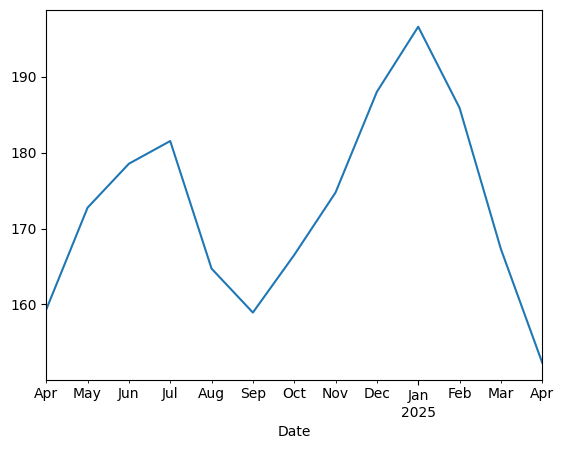

In [83]:
aylik_ortalama.plot()

In [86]:
# pandas.eval() => daha hızlı işlemler için kullanılabilir.
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)

In [90]:
df1, df2, df3, df4 = [pd.DataFrame(rng.rand(nrows, ncols)) for i in range(4)]

In [91]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891
1,0.031429,0.636410,0.314356,0.508571,0.907566,0.249292,0.410383,0.755551,0.228798,0.076980,...,0.093103,0.897216,0.900418,0.633101,0.339030,0.349210,0.725956,0.897110,0.887086,0.779876
2,0.642032,0.084140,0.161629,0.898554,0.606429,0.009197,0.101472,0.663502,0.005062,0.160808,...,0.030500,0.037348,0.822601,0.360191,0.127061,0.522243,0.769994,0.215821,0.622890,0.085347
3,0.051682,0.531355,0.540635,0.637430,0.726091,0.975852,0.516300,0.322956,0.795186,0.270832,...,0.990505,0.412618,0.372018,0.776413,0.340804,0.930757,0.858413,0.428994,0.750871,0.754543
4,0.103124,0.902553,0.505252,0.826457,0.320050,0.895523,0.389202,0.010838,0.905382,0.091287,...,0.455657,0.620133,0.277381,0.188121,0.463698,0.353352,0.583656,0.077735,0.974395,0.986211


In [92]:
%timeit df1 + df2 + df3 + df4

182 ms ± 13.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [94]:
%timeit pd.eval('df1 + df2 + df3 + df4') 

267 ms ± 88.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [96]:
df = pd.DataFrame(rng.rand(1000,3), columns = ['A','B','C'])
df.head()

,A,B,C
0,0.099772,0.365763,0.422644
1,0.941930,0.160890,0.832411
2,0.692094,0.255150,0.668258
3,0.901389,0.718069,0.577554
4,0.944688,0.354645,0.494979


In [97]:
sonuc1 = (df['A'] + df['B']) / (df['C'] - 1)

In [98]:
sonuc1.head()

0   -0.806323
1   -6.580502
2   -2.855360
3   -3.833524
4   -2.572830
dtype: float64

In [99]:
sonuc2 = pd.eval("(df.A + df.B) / (df.C - 1)")

In [100]:
sonuc2.head()

0   -0.806323
1   -6.580502
2   -2.855360
3   -3.833524
4   -2.572830
dtype: float64